In [18]:
from utils import config
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

params = config()
clustered_path = params['clustered']
model_path = params['model']
final_path = params['final']

df = pd.read_csv(clustered_path)
km = joblib.load(model_path)
numeric_columns = pd.read_csv(final_path).drop(['Unnamed: 0'],axis=1).select_dtypes(include='number').columns

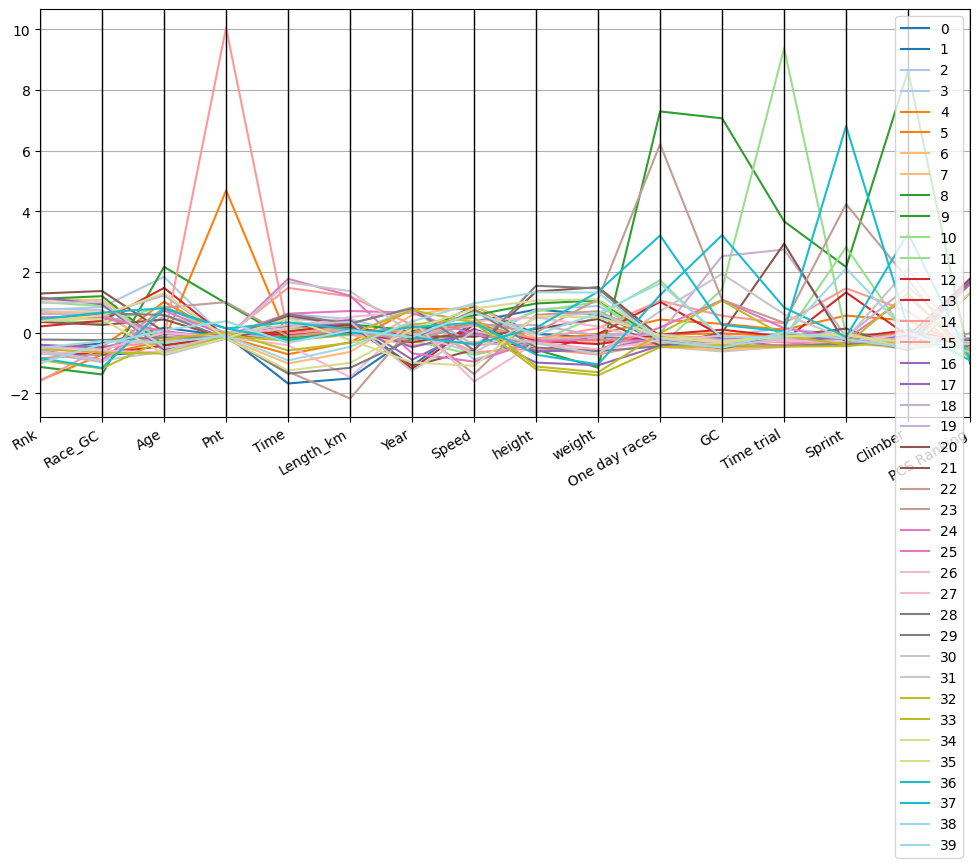

In [19]:
centroids_df = pd.DataFrame(km.cluster_centers_, columns=numeric_columns)
centroids_df['cluster'] = centroids_df.index

fig, ax = plt.subplots(figsize=(12,6))
pd.plotting.parallel_coordinates(centroids_df, 'cluster', ax=ax, colormap='tab20')
fig.autofmt_xdate()

Clusters of note:


Cluster 25 Contains the best climbers / GC. This Cluster contains potential team leaders too.

Cluster 14 contains The best Sprinters. Of note is the massive spike in points. This is due of the fact that it's the sprinters job to punch through and earn points for the team. This cluster contains Peter Sagan, one of the greatest sprinters of all time (Now Retired).



Cluster 25: Best Climbers / GC

In [2]:

cluster_map = pd.DataFrame()

cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_

climber = df.iloc[cluster_map[cluster_map.cluster == 25].data_index]
climber = climber.query('Age <= 25')

top_7_climbers = climber['Rider'].value_counts()
print(top_7_climbers[:7])

Rider
POGAČAR Tadej     9
BARGUIL Warren    8
MAS Enric         7
WELLENS Tim       5
YATES Simon       5
YATES Adam        5
BERNAL Egan       5
Name: count, dtype: int64


Cluster 14: Best Sprinters

In [ ]:
sprinters = df.iloc[cluster_map[cluster_map.cluster == 14].data_index]
sprinters = sprinters.query('Age <= 25')

top_7_sprinters = sprinters['Rider'].value_counts()
print(top_7_sprinters[:7])

Rider
SAGAN Peter         16
DEGENKOLB John      11
POGAČAR Tadej        9
EWAN Caleb           8
GAVIRIA Fernando     8
PHILIPSEN Jasper     6
PINOT Thibaut        6
Name: count, dtype: int64


In [20]:
sprinters = df.iloc[cluster_map[cluster_map.cluster == 4].data_index]
sprinters = sprinters.query('Age <= 25')

top_7_sprinters = sprinters['Rider'].value_counts()
print(top_7_sprinters[:7])

Rider
EWAN Caleb          35
GAVIRIA Fernando    26
MATTHEWS Michael    15
BERNAL Egan         15
PHILIPSEN Jasper    15
ACKERMANN Pascal    14
POGAČAR Tadej       13
Name: count, dtype: int64
